<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/EDA_and_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as sns
import re
import io
import string

### Import

In [ ]:
raw = pd.read_csv('jigsaw-toxic-comment-train.csv')

In [ ]:
raw.shape

(223549, 8)

In [ ]:
raw.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Clean

In [ ]:
clean = []
for elem in raw.comment_text:
  #remove ip address
  elem = re.sub( r'[0-9]+(?:\.[0-9]+){3}','', elem )
  #remove url
  elem = re.sub(r'^https?:\/\/.*[\r\n]*', '', elem)
  #remove tab/newline
  elem = re.sub(r'[\n\t]',' ',elem)
  #remove punctuation
  elem = elem.translate(elem.maketrans("","",string.punctuation))
  #remove multiple space
  elem = re.sub(r'[ ]{2,}',' ',elem)
  clean.append(elem)

In [ ]:
clean

['Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They werent vandalisms just closure on some GAs after I voted at New York Dolls FAC And please dont remove the template from the talk page since Im retired now',
 'Daww He matches this background colour Im seemingly stuck with Thanks talk 2151 January 11 2016 UTC',
 'Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info',
 ' More I cant make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know The

In [ ]:
clean[3]

' More I cant make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up Its listed in the relevant form eg WikipediaGoodarticlenominationsTransport '

In [ ]:
train = raw
train.drop("comment_text", axis=1, inplace = True)
train["comment_text"] = clean

In [ ]:
train = train.set_index('id')

train["comment_text"].fillna("unknown", inplace=True)

In [ ]:
train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
id,,,,,,,
0000997932d777bf,0,0,0,0,0,0,Explanation Why the edits made under my userna...
000103f0d9cfb60f,0,0,0,0,0,0,Daww He matches this background colour Im seem...
000113f07ec002fd,0,0,0,0,0,0,Hey man Im really not trying to edit war Its j...
0001b41b1c6bb37e,0,0,0,0,0,0,More I cant make any real suggestions on impr...
0001d958c54c6e35,0,0,0,0,0,0,You sir are my hero Any chance you remember wh...


### Exploration

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223549 entries, 0000997932d777bf to fffb5451268fb5ba
Data columns (total 7 columns):
toxic            223549 non-null int64
severe_toxic     223549 non-null int64
obscene          223549 non-null int64
threat           223549 non-null int64
insult           223549 non-null int64
identity_hate    223549 non-null int64
comment_text     223549 non-null object
dtypes: int64(6), object(1)
memory usage: 13.6+ MB


In [ ]:
train.shape

(223549, 7)

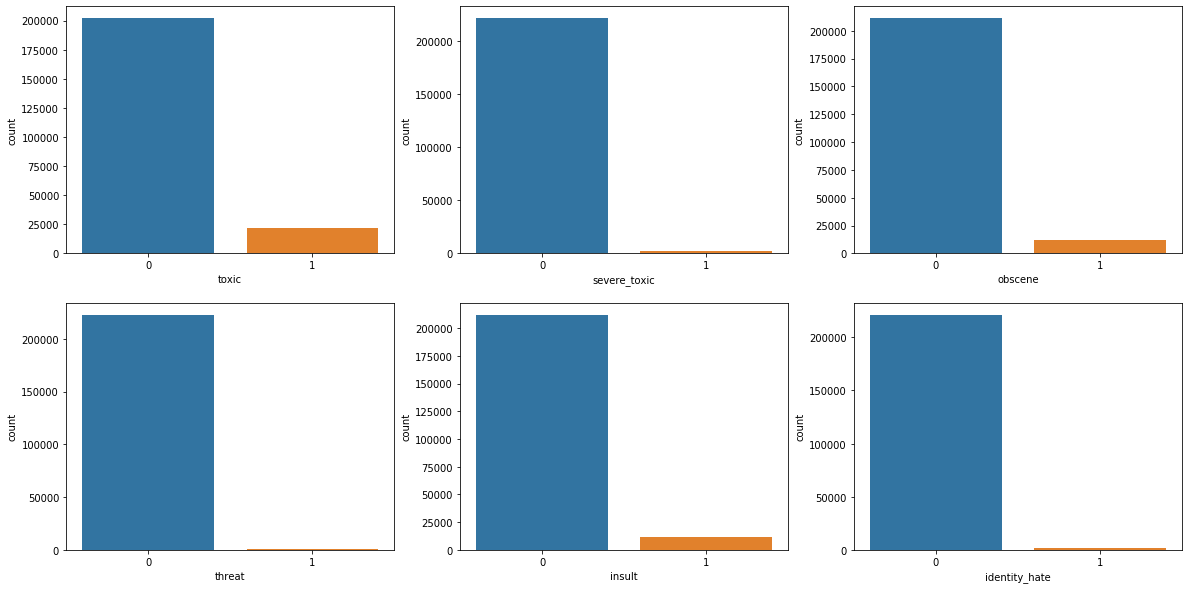

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
# sns.set(style="darkgrid")
sns.countplot(train['toxic'],ax=axs[0,0])
sns.countplot(train['severe_toxic'],ax=axs[0,1])
sns.countplot(train['obscene'],ax=axs[0,2])
sns.countplot(train['threat'], ax = axs[1,0])
sns.countplot(train['insult'], ax=axs[1,1])
sns.countplot(train['identity_hate'],  ax = axs[1,2])

In [ ]:
# sns.set(style="dark")

Text(0.5, 1.0, 'not hate VS. hate')

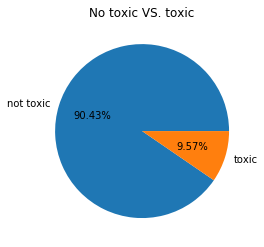

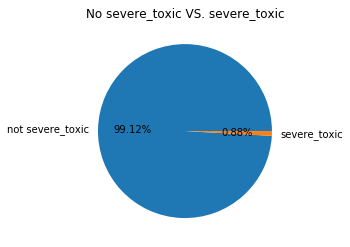

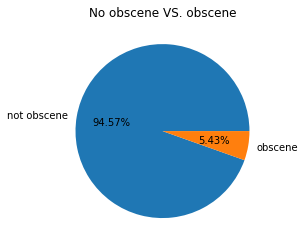

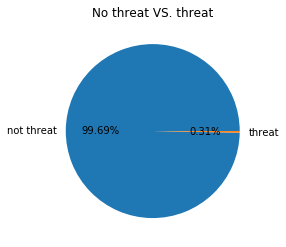

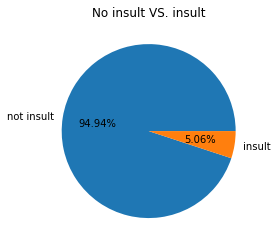

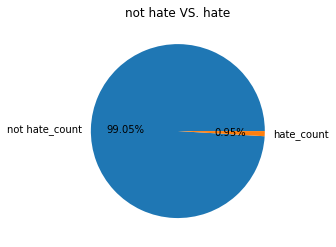

In [ ]:
toxic_label = 'not toxic',"toxic"
toxic_size = [202165,21384]

severe_toxic_label = "not severe_toxic","severe_toxic"
severe_toxic_size = [221587,1962]

obscene_label = "not obscene","obscene"
obscene_size = [211409,12140]

threat_label = "not threat","threat"
threat_size = [222860,689]

insult_label = "not insult","insult"
insult_size = [212245,11304]

hate_label = "not hate_count","hate_count"
hate_size = [221432,2117]



fig1 = plt.figure()
plt.pie(toxic_size,labels=toxic_label,autopct='%1.2f%%')
plt.title("No toxic VS. toxic")

fig2 = plt.figure()
plt.pie(severe_toxic_size,labels=severe_toxic_label,autopct='%1.2f%%')
plt.title("No severe_toxic VS. severe_toxic")

fig3 = plt.figure()
plt.pie(obscene_size,labels=obscene_label,autopct='%1.2f%%')
plt.title("No obscene VS. obscene")

fig4 = plt.figure()
plt.pie(threat_size,labels=threat_label,autopct='%1.2f%%')
plt.title("No threat VS. threat")

fig5 = plt.figure()
plt.pie(insult_size,labels=insult_label,autopct='%1.2f%%')
plt.title("No insult VS. insult")

fig6 = plt.figure()
plt.pie(hate_size ,labels=hate_label,autopct='%1.2f%%')
plt.title("not hate VS. hate")

In [ ]:
# make a calculation
no =21384+1962+12140+689+11304+2117
toxic_rate = '%.2f%%' % (float(21384) / float(223549) * 100)
severe_toxic_rate = '%.2f%%' % (float(1962) / float(223549) * 100)
obscene_rate ='%.2f%%' % (float(12140) / float(223549) * 100)
threat_rate = '%.2f%%' % (float(689) / float(223549) * 100)
insult_rate ='%.2f%%' % (float(11304) / float(223549) * 100)
hate_rate = '%.2f%%' % (float(2117) / float(223549) * 100)
dont_have ='%.2f%%' % (100-float(no) / float(223549) * 100)



In [ ]:
table1 = {'Tox type':["toxic", 'severe', 'obscene', 'threat','insult'
                      ,'hate',"not below"], 
     'percentage':[toxic_rate, severe_toxic_rate, obscene_rate, threat_rate,insult_rate,hate_rate,dont_have],}
table1 = pd.DataFrame(table1)
print(table1)

    No photo   Photo
0      toxic   9.57%
1     severe   0.88%
2    obscene   5.43%
3     threat   0.31%
4     insult   5.06%
5       hate   0.95%
6  not below  77.81%


Text(0.5, 1.0, 'Toxic level')

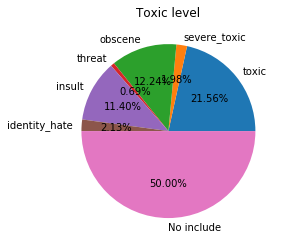

In [ ]:
labels = 'toxic', 'severe_toxic','obscene','threat','insult','identity_hate',"No include"
sizes = [21384, 1962,12140,689,11304,2117,no]



fig = plt.figure()
plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.title("Toxic level")

In [ ]:
corr = train.corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.289325,0.697349,0.161360,0.666690,0.281483
severe_toxic,0.289325,1.000000,0.375318,0.131472,0.350608,0.212644
obscene,0.697349,0.375318,1.000000,0.143005,0.745039,0.296548
threat,0.161360,0.131472,0.143005,1.000000,0.151066,0.115382
insult,0.666690,0.350608,0.745039,0.151066,1.000000,0.348853
identity_hate,0.281483,0.212644,0.296548,0.115382,0.348853,1.000000


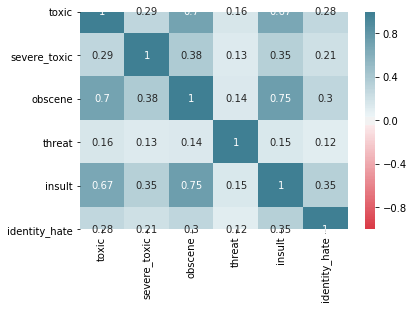

In [ ]:

sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 220, n=200),annot = True);

["toxic","severe_toxic",'obscene','threat','insult','identity_hate']

### Logistic Regression - comment_text v. toxic

In [ ]:
y_columns = "toxic"
x_columns= "comment_text"

#### Split

In [ ]:
x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [ ]:
x_train,y_train

(id
 b4f573637302d67b    AfD nomination of Centurion Scarrow novel An a...
 007db1f1477ea977    I dont at all propose that it should be transc...
 a90805ea511f85b5                    Hey Dont be so hard on us morons 
 a11d8fd50297d10a    Ah I may even have a year of birth 1929 Would ...
 bdfb5ff62a4179d0     I asked that question once in jest and the qu...
                                           ...                        
 130c0ffea46ccc20    Image source problem with ImageMeritInConstruc...
 289b92d86c0d0000    WikiProject class rating This article was auto...
 a170b4d3824ddeba    STOP VANDALIZING MY POST My edit is useful and...
 adf574d93bec0bab                               your a stupid butthole
 86b2fb88dbfc80fa     Actually this makes me happier Will update ar...
 Name: comment_text, Length: 178839, dtype: object, id
 b4f573637302d67b    0
 007db1f1477ea977    0
 a90805ea511f85b5    1
 a11d8fd50297d10a    0
 bdfb5ff62a4179d0    0
                    ..
 130c0ffea46ccc20    0

In [ ]:
TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

y_train = TfidfVector.fit_transform(y_train)
y_test = TfidfVector.transform(y_test)

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Logistic Regression Train Error

In [ ]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


[[160694   1082]
 [  6914  10149]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    161776
           1       0.90      0.59      0.72     17063

    accuracy                           0.96    178839
   macro avg       0.93      0.79      0.85    178839
weighted avg       0.95      0.96      0.95    178839



#### Logistic Regression Test Error

In [ ]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

[[40002   387]
 [ 1812  2509]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     40389
           1       0.87      0.58      0.70      4321

    accuracy                           0.95     44710
   macro avg       0.91      0.79      0.83     44710
weighted avg       0.95      0.95      0.95     44710



In [ ]:
#I getting this frome stackoverflow  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(10, 6))
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin = 'lower')
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

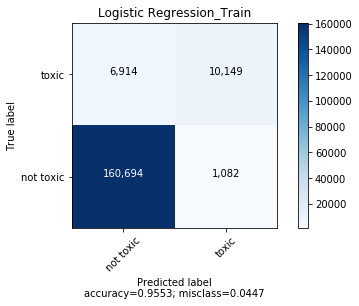

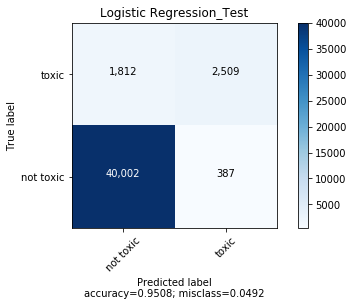

In [ ]:
labels = ['not toxic', 'toxic']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. severe_toxic

In [ ]:
y_columns = "severe_toxic"
x_columns= "comment_text"

In [ ]:
x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

[[177069    235]
 [  1202    333]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177304
           1       0.59      0.22      0.32      1535

    accuracy                           0.99    178839
   macro avg       0.79      0.61      0.66    178839
weighted avg       0.99      0.99      0.99    178839

[[44203    80]
 [  335    92]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44283
           1       0.53      0.22      0.31       427

    accuracy                           0.99     44710
   macro avg       0.76      0.61      0.65     44710
weighted avg       0.99      0.99      0.99     44710



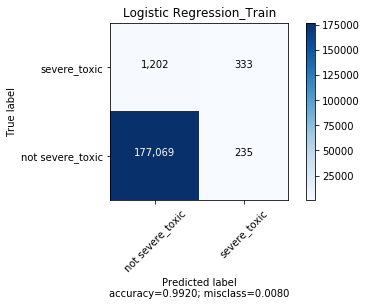

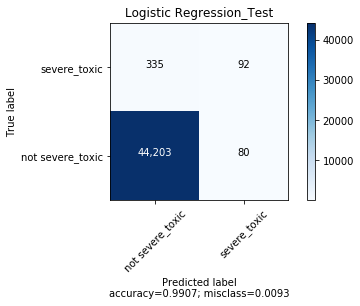

In [ ]:
labels = ['not severe_toxic', 'severe_toxic']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. obscene

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[168560    607]
 [  3670   6002]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    169167
           1       0.91      0.62      0.74      9672

    accuracy                           0.98    178839
   macro avg       0.94      0.81      0.86    178839
weighted avg       0.97      0.98      0.97    178839

[[42040   202]
 [  957  1511]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     42242
           1       0.88      0.61      0.72      2468

    accuracy                           0.97     44710
   macro avg       0.93      0.80      0.85     44710
weighted avg       0.97      0.97      0.97     44710



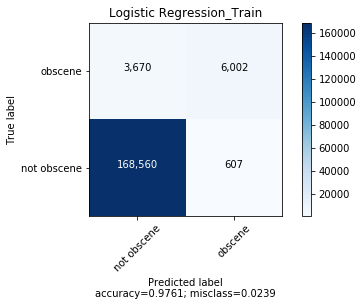

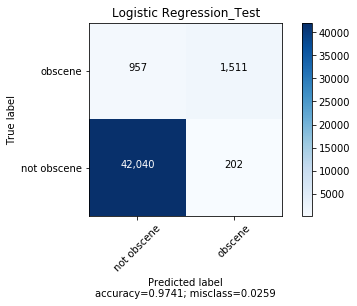

In [ ]:
y_columns = "obscene"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not obscene', 'obscene']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. threat

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[178265     32]
 [   469     73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178297
           1       0.70      0.13      0.23       542

    accuracy                           1.00    178839
   macro avg       0.85      0.57      0.61    178839
weighted avg       1.00      1.00      1.00    178839

[[44553    10]
 [  127    20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44563
           1       0.67      0.14      0.23       147

    accuracy                           1.00     44710
   macro avg       0.83      0.57      0.61     44710
weighted avg       1.00      1.00      1.00     44710



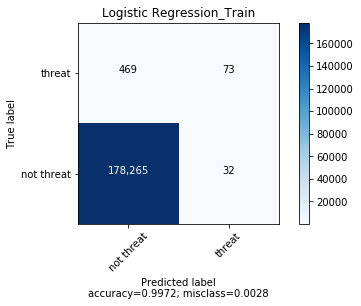

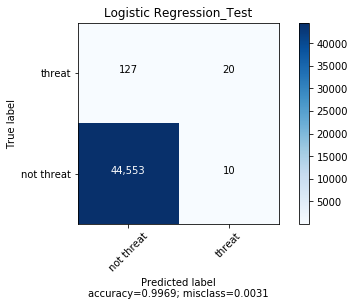

In [ ]:
y_columns = "threat"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not threat', 'threat']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. insult

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[169058    832]
 [  4398   4551]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    169890
           1       0.85      0.51      0.64      8949

    accuracy                           0.97    178839
   macro avg       0.91      0.75      0.81    178839
weighted avg       0.97      0.97      0.97    178839

[[42100   255]
 [ 1179  1176]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42355
           1       0.82      0.50      0.62      2355

    accuracy                           0.97     44710
   macro avg       0.90      0.75      0.80     44710
weighted avg       0.96      0.97      0.96     44710



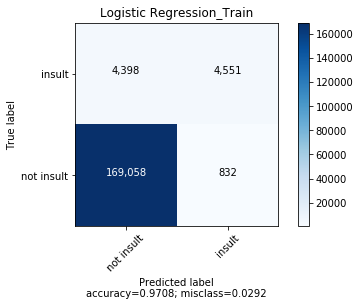

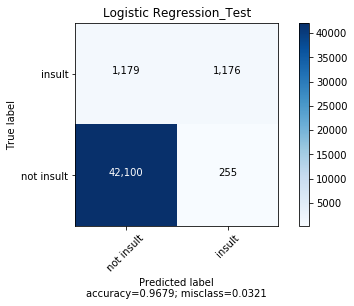

In [ ]:
y_columns = "insult"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not insult', 'insult']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. identity_hate

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[177044    114]
 [  1314    367]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177158
           1       0.76      0.22      0.34      1681

    accuracy                           0.99    178839
   macro avg       0.88      0.61      0.67    178839
weighted avg       0.99      0.99      0.99    178839

[[44224    50]
 [  351    85]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44274
           1       0.63      0.19      0.30       436

    accuracy                           0.99     44710
   macro avg       0.81      0.60      0.65     44710
weighted avg       0.99      0.99      0.99     44710



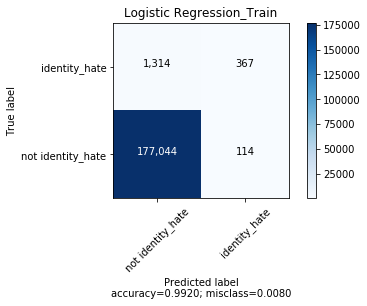

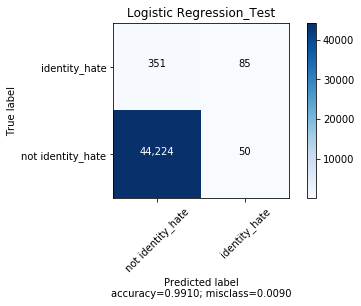

In [ ]:
y_columns = "identity_hate"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not identity_hate', 'identity_hate']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)